# Import Libraries and Prerequisites


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mne

In [202]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import librosa
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from scipy.signal import filtfilt
from scipy import stats

%matplotlib notebook
%matplotlib inline


# Preprocess dataset

### Load Data

In [120]:
sampling_rate = 128 # Hertz

In [121]:
file_names_adhd_dataset = ['v8p.csv', 'v35p.csv', 'v37p.csv', 'v36p.csv', 'v38p.csv', 'v6p.csv', 'v40p.csv', 'v39p.csv', 'v3p.csv', 'v29p.csv', 'v30p.csv', 'v31p.csv', 'v28p.csv', 'v279.csv', 'v33p.csv', 'v25p.csv', 'v286.csv', 'v250.csv', 'v24p.csv', 'v246.csv', 'v263.csv', 'v27p.csv', 'v254.csv', 'v284.csv', 'v238.csv', 'v265.csv', 'v227.csv', 'v215.csv', 'v236.csv', 'v22p.csv', 'v21p.csv', 'v231.csv', 'v244.csv', 'v213.csv', 'v274.csv', 'v200.csv', 'v206.csv', 'v19p.csv', 'v173.csv', 'v270.csv', 'v234.csv', 'v179.csv', 'v181.csv', 'v18p.csv', 'v14p.csv', 'v196.csv', 'v209.csv', 'v183.csv', 'v12p.csv', 'v219.csv', 'v15p.csv', 'v20p.csv', 'v198.csv', 'v190.csv', 'v1p.csv', 'v32p.csv', 'v177.csv', 'v10p.csv', 'v34p.csv', 'v288.csv', 'v204.csv']
# len(file_names_adhd_dataset)

61

In [6]:
file_names_control_dataset = ['v51p.csv', 'v59p.csv', 'v304.csv', 'v45p.csv', 'v54p.csv', 'v58p.csv', 'v53p.csv', 'v60p.csv', 'v56p.csv', 'v46p.csv', 'v308.csv', 'v42p.csv', 'v43p.csv', 'v306.csv', 'v48p.csv', 'v50p.csv', 'v52p.csv', 'v302.csv', 'v44p.csv', 'v47p.csv', 'v307.csv', 'v57p.csv', 'v303.csv', 'v127.csv', 'v134.csv', 'v121.csv', 'v299.csv', 'v151.csv', 'v116.csv', 'v125.csv', 'v133.csv', 'v300.csv', 'v147.csv', 'v298.csv', 'v113.csv', 'v118.csv', 'v117.csv', 'v120.csv', 'v111.csv', 'v107.csv', 'v114.csv', 'v108.csv', 'v115.csv', 'v305.csv', 'v140.csv', 'v149.csv', 'v309.csv', 'v123.csv', 'v138.csv', 'v112.csv', 'v41p.csv', 'v129.csv', 'v143.csv', 'v310.csv', 'v131.csv', 'v297.csv', 'v109.csv', 'v49p.csv', 'v55p.csv', 'v110.csv']
# len(file_names_control_dataset)

60

### Functions for preprocessing
BandPassFilter to filter signal noise.
Preprocess_file: preprocesses a single file.
Preprocess_group: preprocess and save all files to a corresponding group folder.

In [197]:
# filter channel and reduce noise.
def bandPassFilter(signal):
    fs = 4000.0
    lowcut = 10.0
    highcut = 40.0

    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    order = 2
    b, a = scipy.signal.butter(order, [low, high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b, a, signal, axis=0)

    return y

In [207]:
# Preprocessing for an entire recording for a patient
def preprocess_file(input_file, output_file, file_name):
  df = pd.read_csv(input_file)
  for column in df.columns:
      df[column] = bandPassFilter(df[column])
  df.to_csv(output_file, index=False)
  print(file_name + " preprocessed successfully and saved ")

In [210]:
# Preprocess all recordings for a specific group
def preprocess_group(group_path, group_file_names, output_path):
  for filename in group_file_names:
    file_name_and_path = group_path + filename;
    preprocess_file(file_name_and_path, output_path + filename, filename)
  print("=============================== Preprocessing group successful =============================== ")

In [ ]:
pathControl = '/content/drive/MyDrive/Braude College Software Engineering/Semesters/Semester 8/Intro to Sensing and Learning/Assignments/EEG Classification/Solution/Code/Dataset/CSV/controlcsv/'
pathADHD = '/content/drive/MyDrive/Braude College Software Engineering/Semesters/Semester 8/Intro to Sensing and Learning/Assignments/EEG Classification/Solution/Code/Dataset/CSV/adhdcsv/'

outputPath = '/content/preprocessed_dataset/'
try:
  # os.mkdir(outputPath)
  os.mkdir(outputPath + '/ADHD/')
  os.mkdir(outputPath + '/Control/')
except FileExistsError:
  print("Folder Already exists.")

# ADHD group preprocessing
preprocess_group(pathADHD, file_names_adhd_dataset, outputPath + '/ADHD/')
preprocess_group(pathControl, file_names_control_dataset, outputPath + '/Control/')


<Axes: >

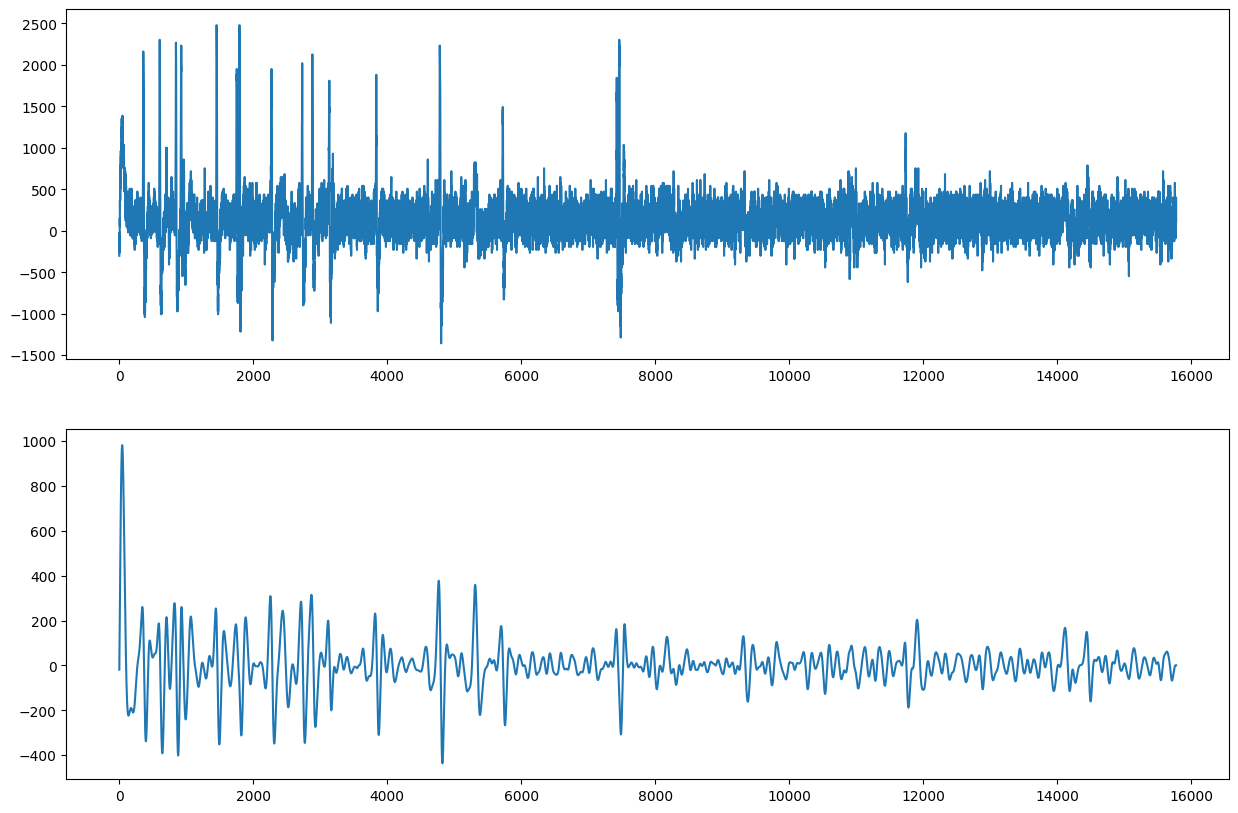

In [223]:
# Just a checkup on a random file and its processed counterpart
df = pd.read_csv(pathADHD + file_names_adhd_dataset[0])
df2 = pd.read_csv(outputPath + '/ADHD/' + file_names_adhd_dataset[0])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))  # Adjust the figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes to simplify the iteration

df['0'].plot(ax = axes[0])
df2['0'].plot(ax = axes[1])



# Train / Test sets split

# Train model

In [ ]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='rbf', gamma='scale')
# learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# MISC


In [ ]:
# Read the CSV file as a NumPy array
x = pathADHD1
data = np.loadtxt(x, delimiter=',')

# Some `information about the channels
onedata = df['0'].values.tolist()

for i in range(0, len(onedata)):
  onedata[i] = str(onedata[i])
onedata.append('0')

ch_names = onedata # TODO: finish this list

# Sampling rate of the Nautilus machine
sfreq = 128  # Hz

# Create the info structure needed by MNE
info = mne.create_info(ch_names, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(data, info)

# Plot it!
raw.plot()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
axes = axes.flatten()
df['2'].plot(kind='line', figsize=(8, 4), title='adhd', ax=axes[0])
df2['2'].plot(kind='line', figsize=(8, 4), title='control', ax=axes[1])
plt.gca().spines[['top', 'right']].set_visible(False)
# plt.xlim([0,3000])
plt.tight_layout()
plt.show()


# Root mean suqare energy

In [115]:
#Root mean square energy
ndarray = df['0'].to_numpy()
RMS_music = librosa.feature.rms(y=ndarray, frame_length=128, hop_length=1)
RMS_music = RMS_music[0]
# RMS_music

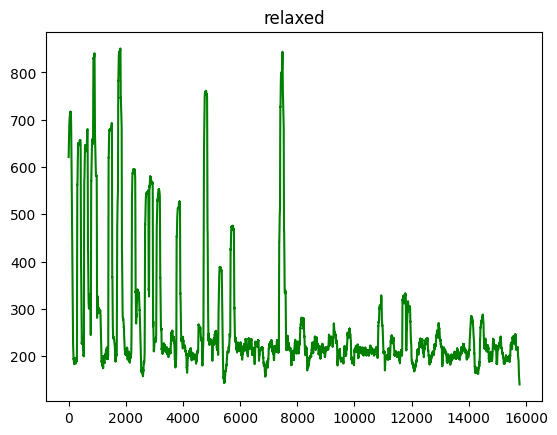

<Axes: >

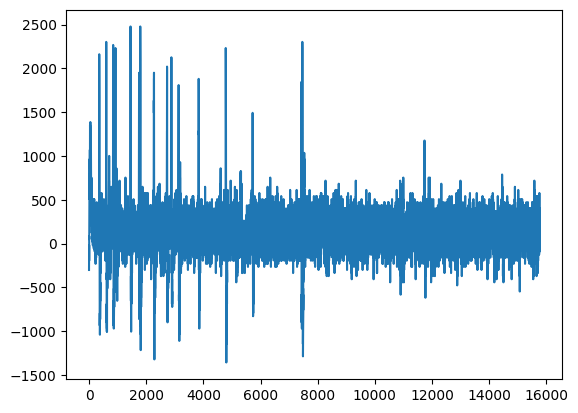

In [116]:
frames = range(len(RMS_music))
plt.plot(frames, RMS_music, color='g')
plt.title('relaxed')
plt.show()
df['0'].plot()